In [5]:
import io
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pickle

import numpy as np
from scipy import stats 
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_1samp

In [6]:
para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/2023-05-01_09-36/para/2023-05-02_07-42/model/evaluation/2023-05-02_12-05/Move/*/*.txt')
not_para_list = glob.glob('/home/robot_dev4/kuroki/UniDOM/ExPCP/policy/log/2023-05-01_09-36/no_para/2023-05-02_06-22/model/evaluation/2023-05-02_12-05/Move/*/*.txt')

In [7]:
# just compre

In [8]:
def info_iou(path_list):
    iou_list = []
    for path in path_list:
        with open(path, 'r') as f:
            iou = f.read()
        iou_list.append(float(iou))
    print('mean', np.mean(iou_list), 'std', np.std(iou_list))
    return iou_list

In [9]:
para_iou_list = info_iou(para_list)
not_para_iou_list = info_iou(not_para_list)

mean nan std nan
mean nan std nan


/home/robot_dev3/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robot_dev3/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robot_dev3/.local/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robot_dev3/.local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robot_dev3/.local/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
stats.ttest_ind(para_iou_list, not_para_iou_list)

Ttest_indResult(statistic=nan, pvalue=nan)

In [11]:
# compare average and success rate

-----------------------------------------
train iteration 0
-----------------------------------------
with parameter policy
success 249 / 500
length mean 0.12519808509425398 std 0.1303050078958856
mu mean 250.13983578383875 std 141.06866730241003
lam mean 256.1712517689492 std 136.7459898977433
yield_stress mean 252.90371778597105 std 143.52132715377397
---------------------------
without parameter policy
success 257 / 500
length mean 0.12402602689702674 std 0.12065278743382865
mu mean 250.13983578383875 std 141.06866730241003
lam mean 256.1712517689492 std 136.7459898977433
yield_stress mean 252.90371778597105 std 143.52132715377397
---------------------------
same success count 161
same para length mean 0.27726945035688716 std 0.04066286542895888
same not para length mean 0.24299804459188434 std 0.004304601678182276
same success count -8
same para length mean 0.2040756936325927 std 0.014471404295824868
same not para length mean 0.0 std 0.0
same success count 8
same para length mean 0

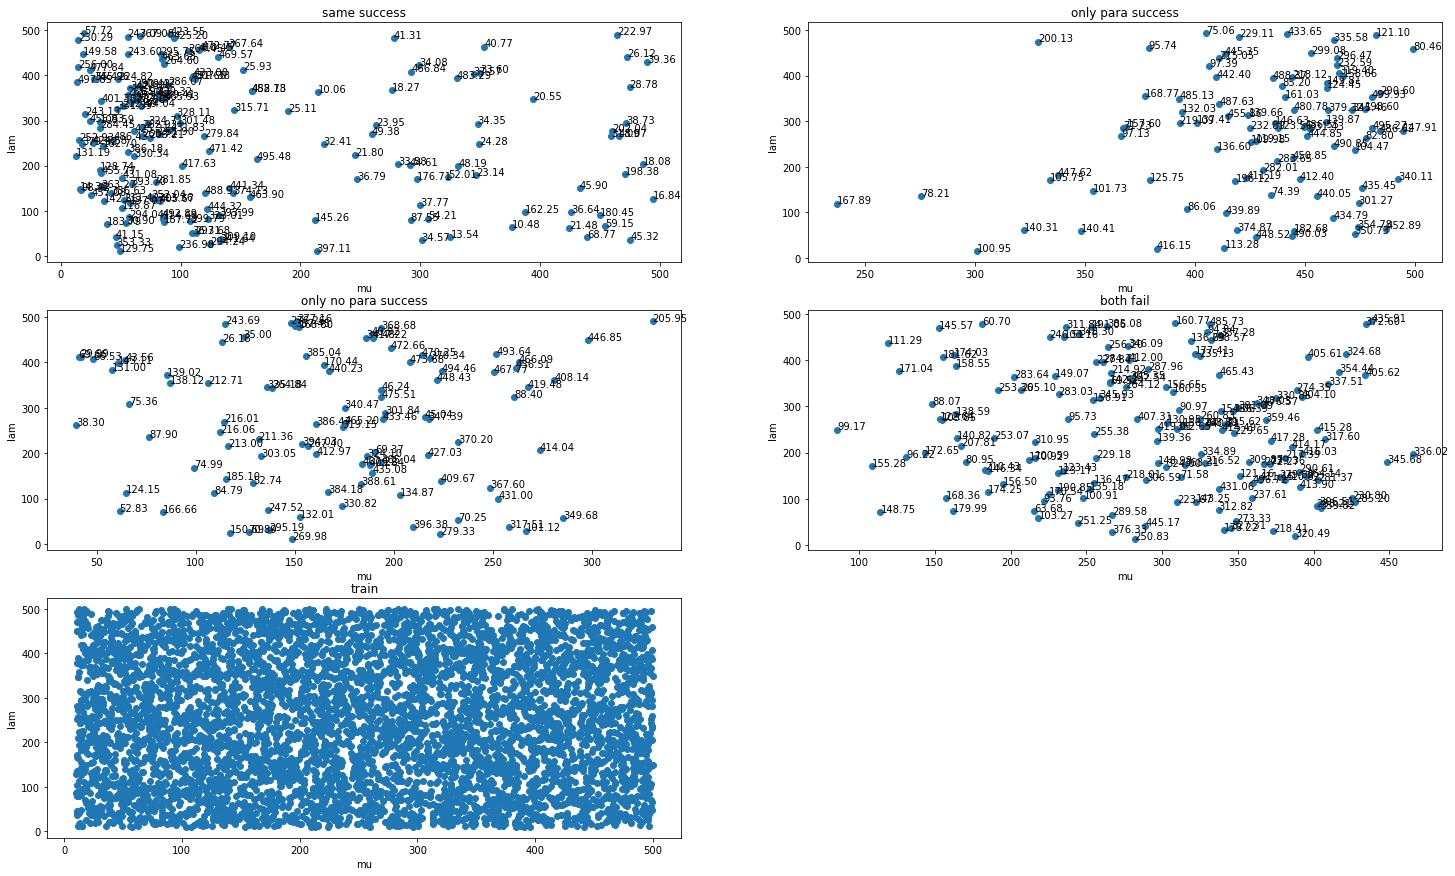

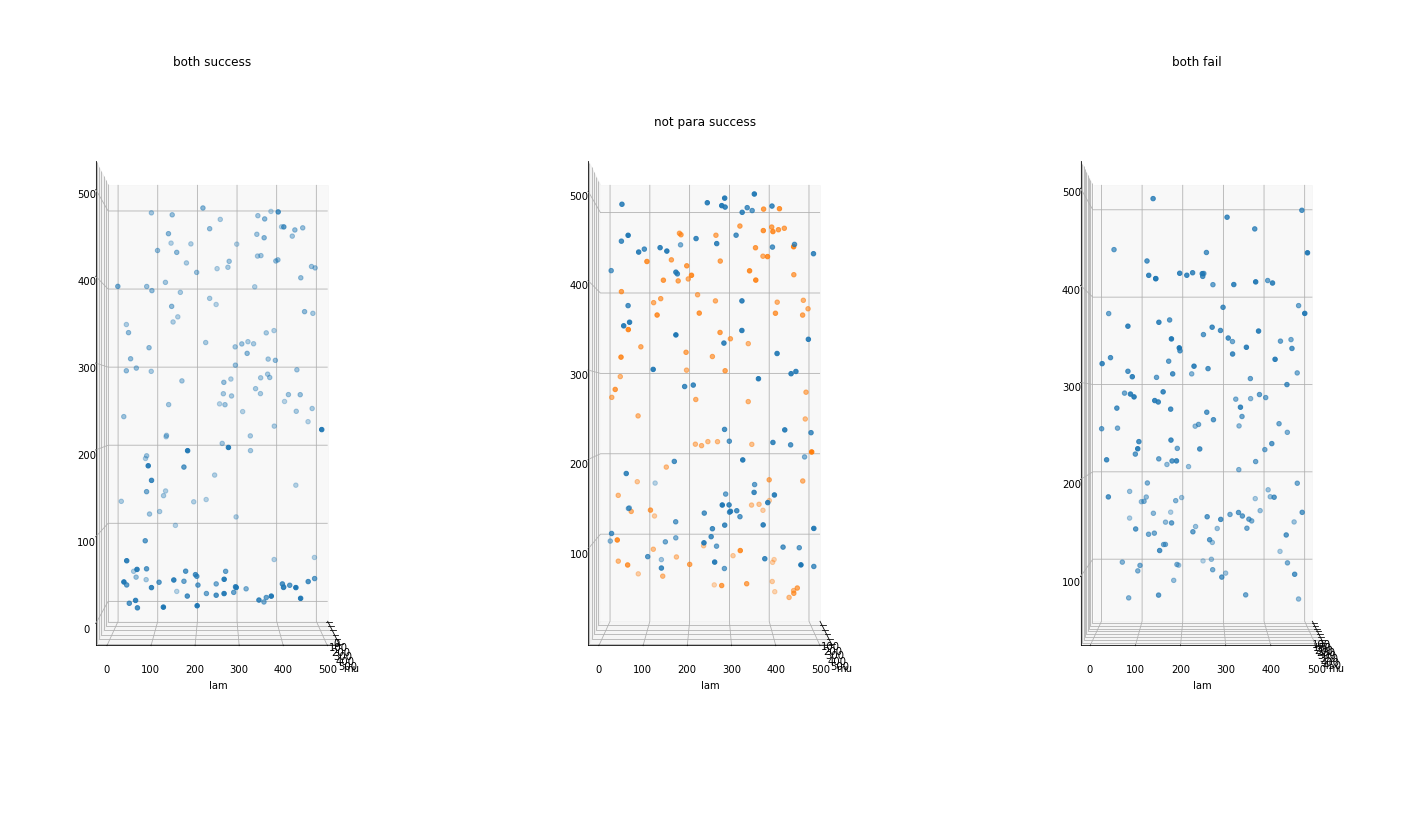

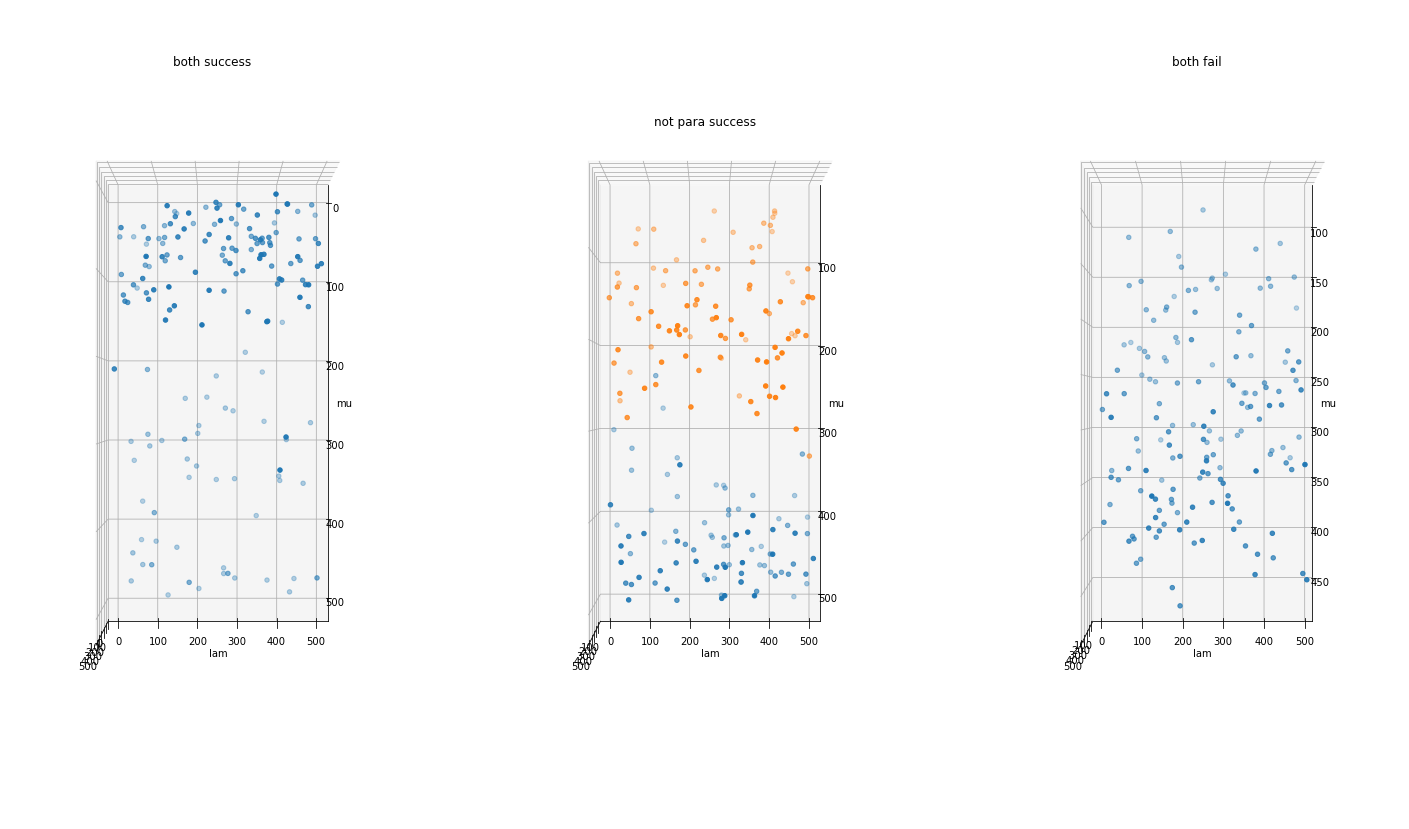

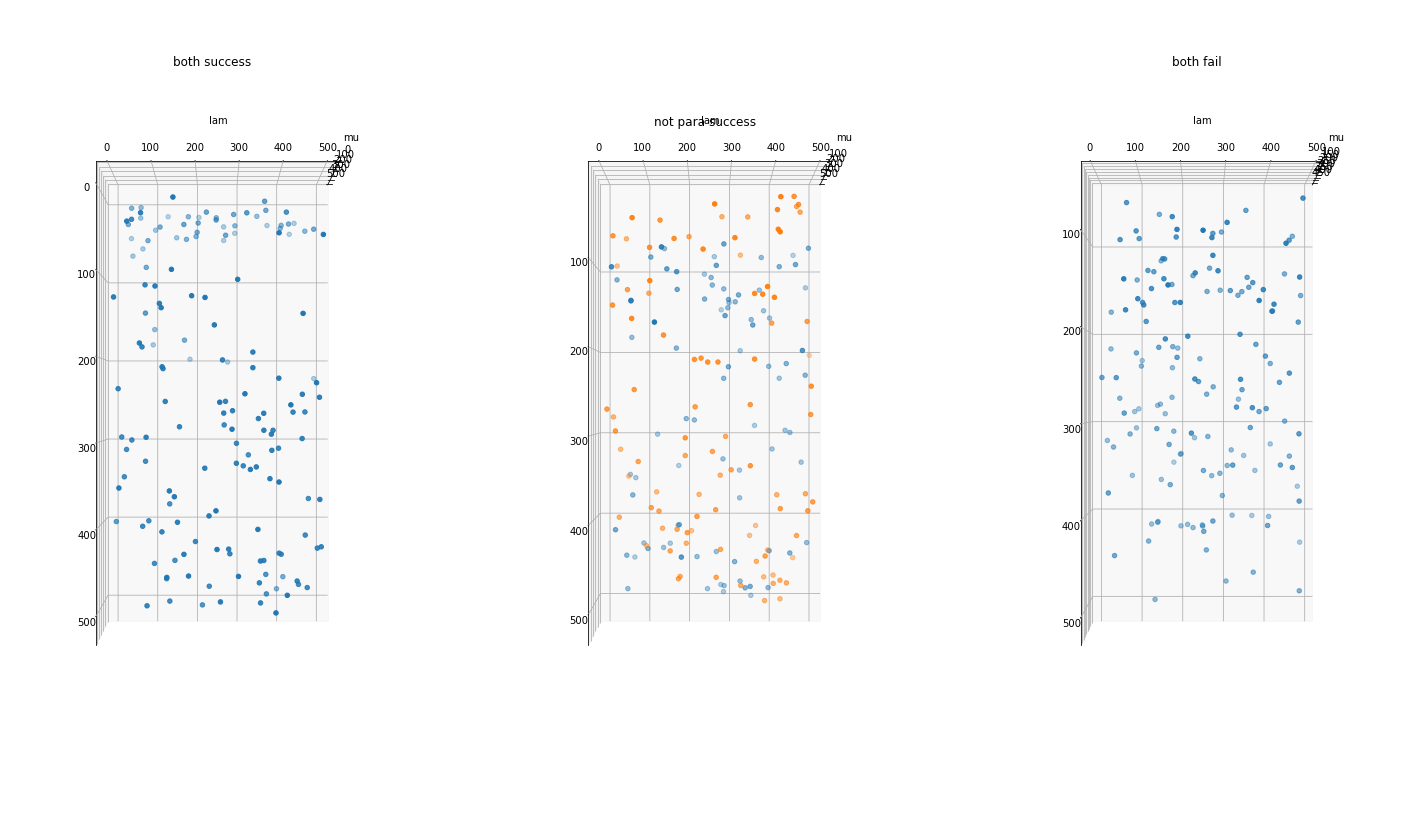

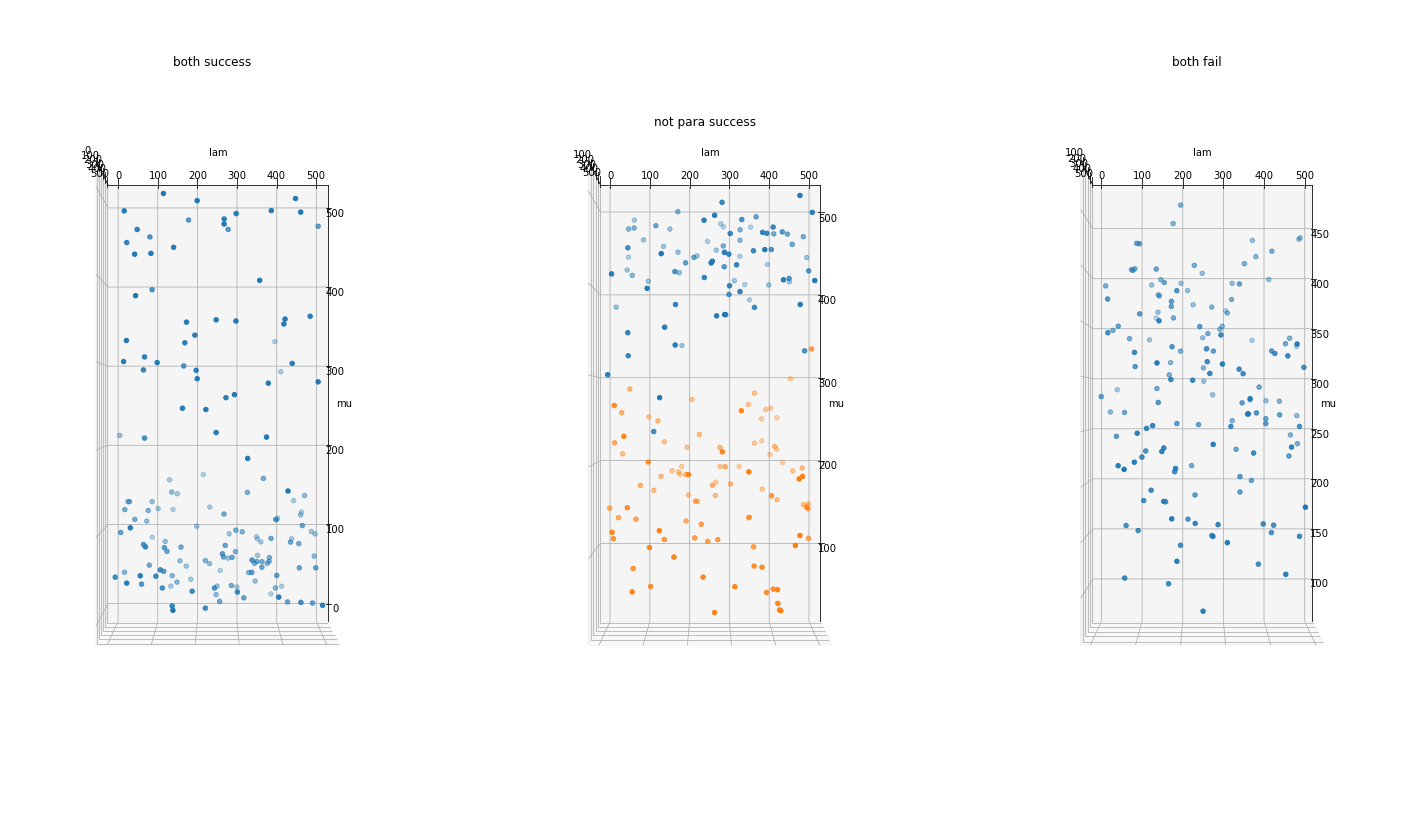

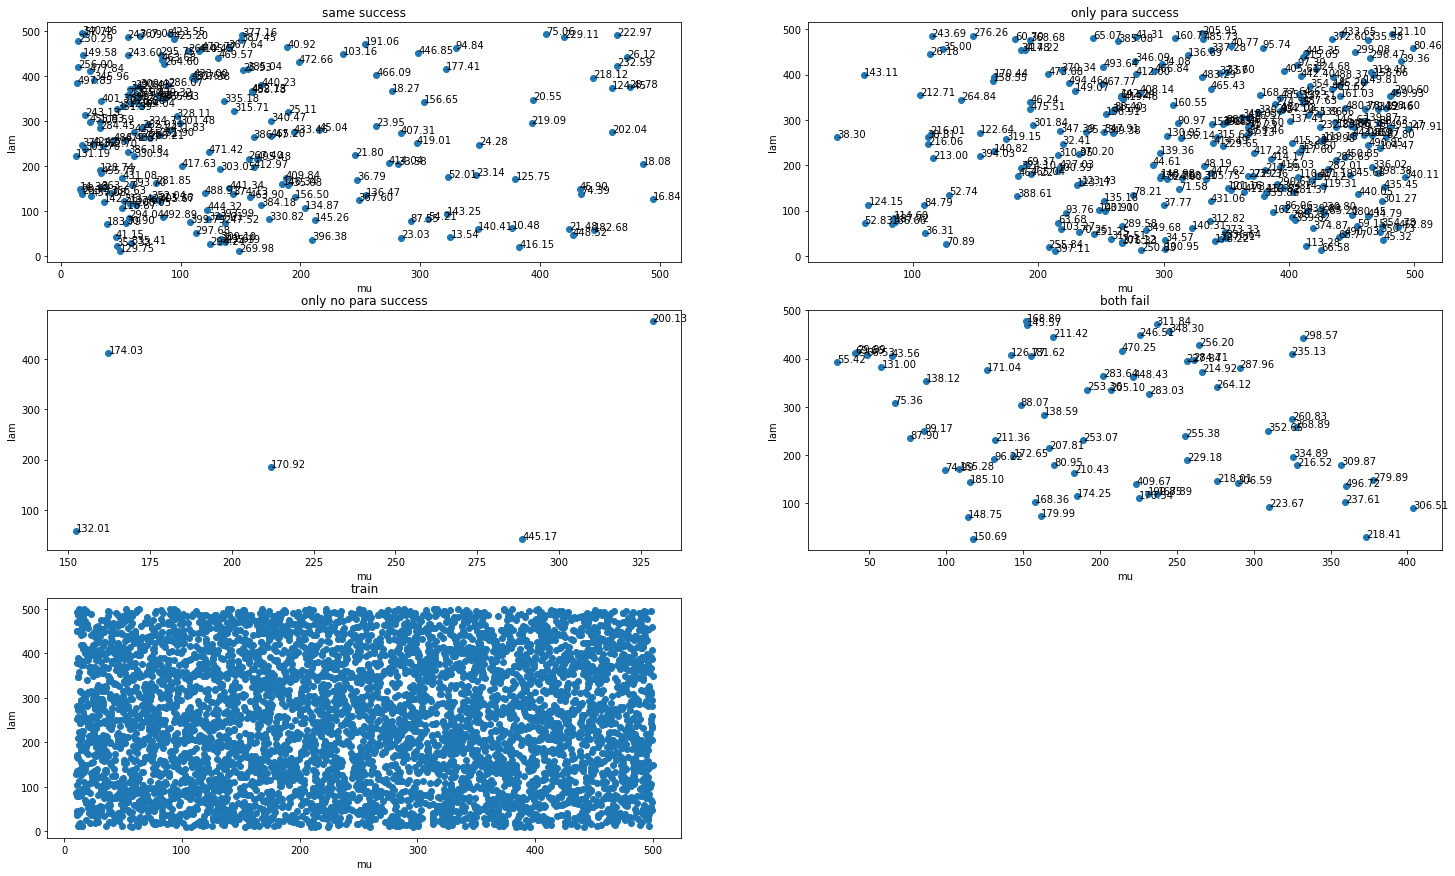

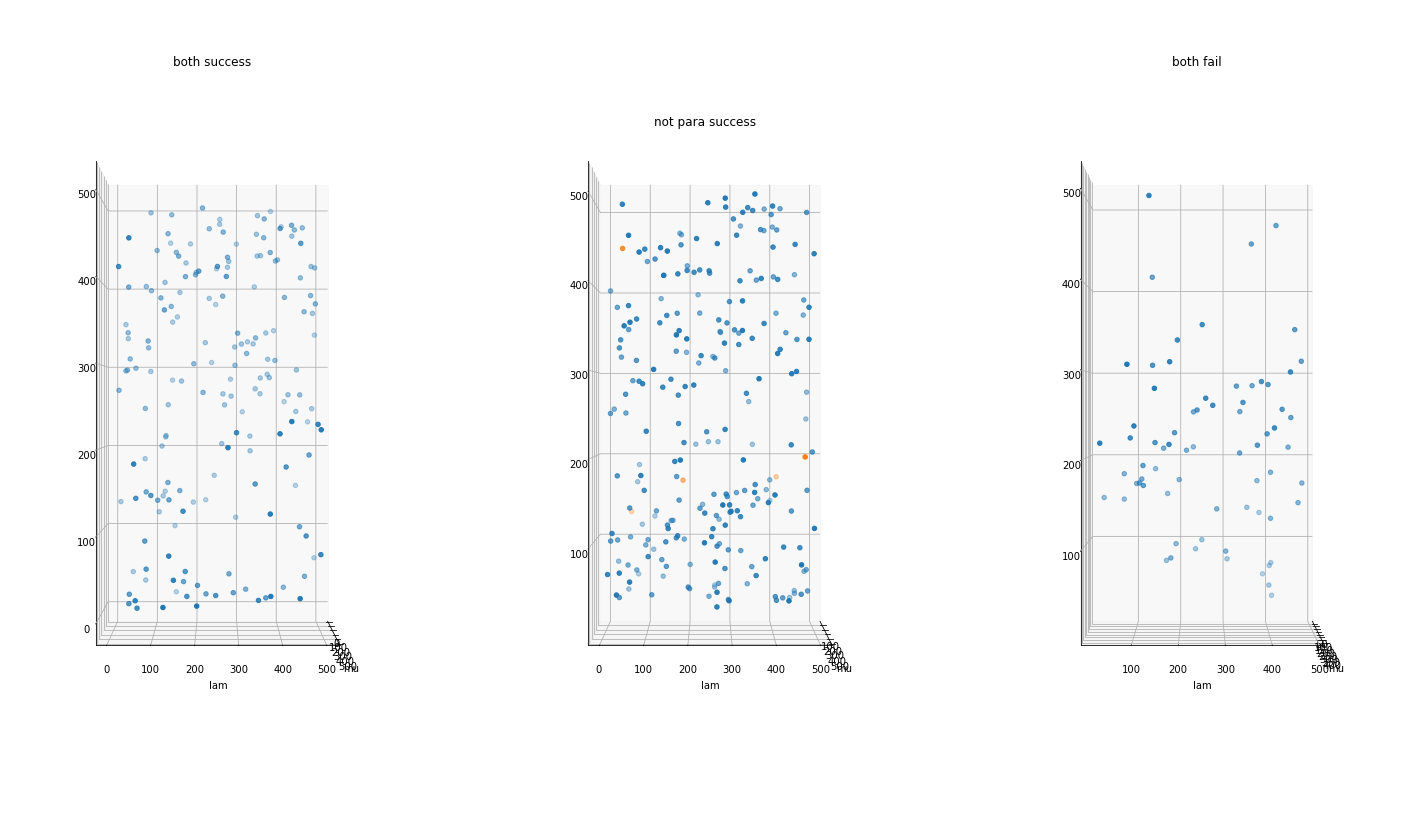

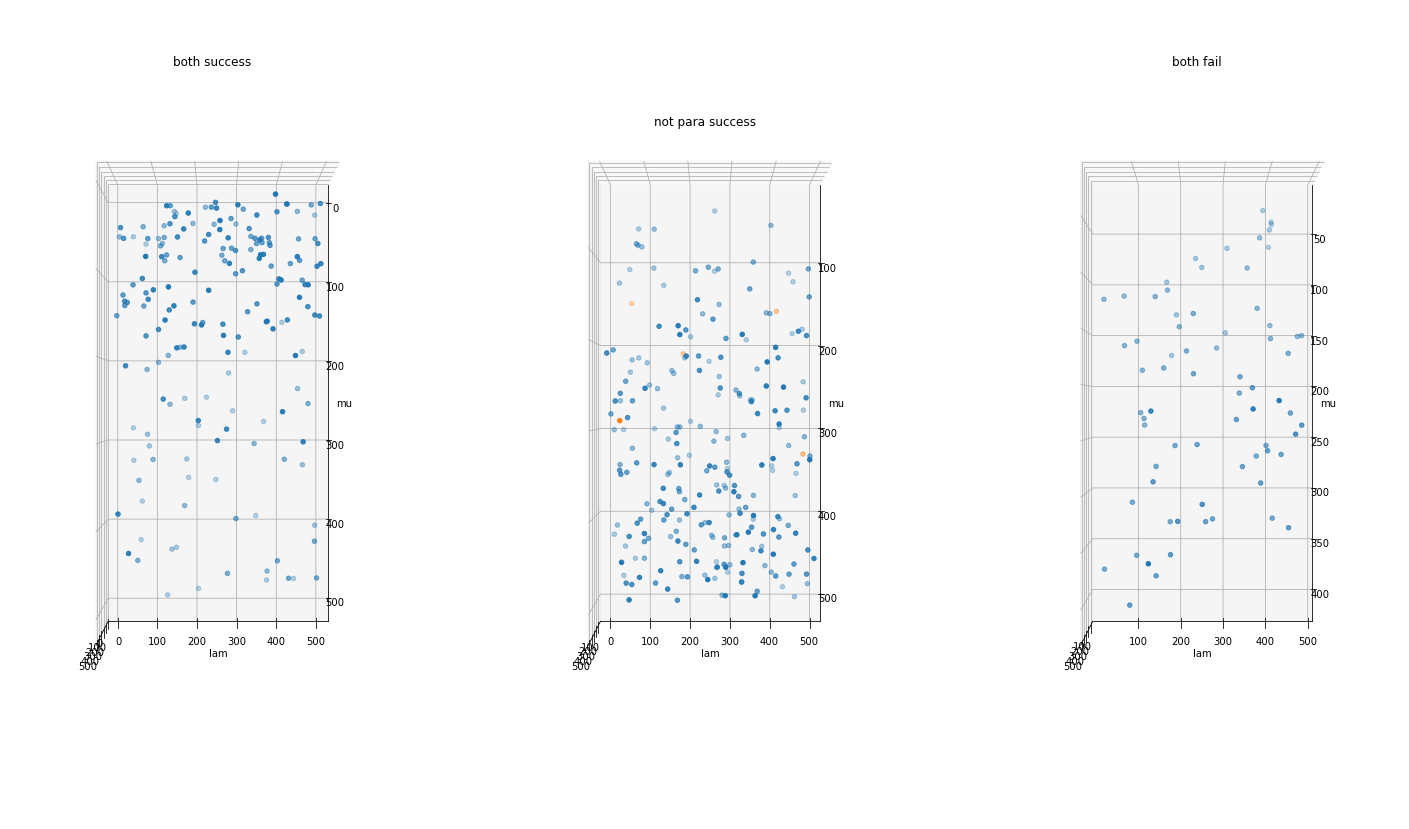

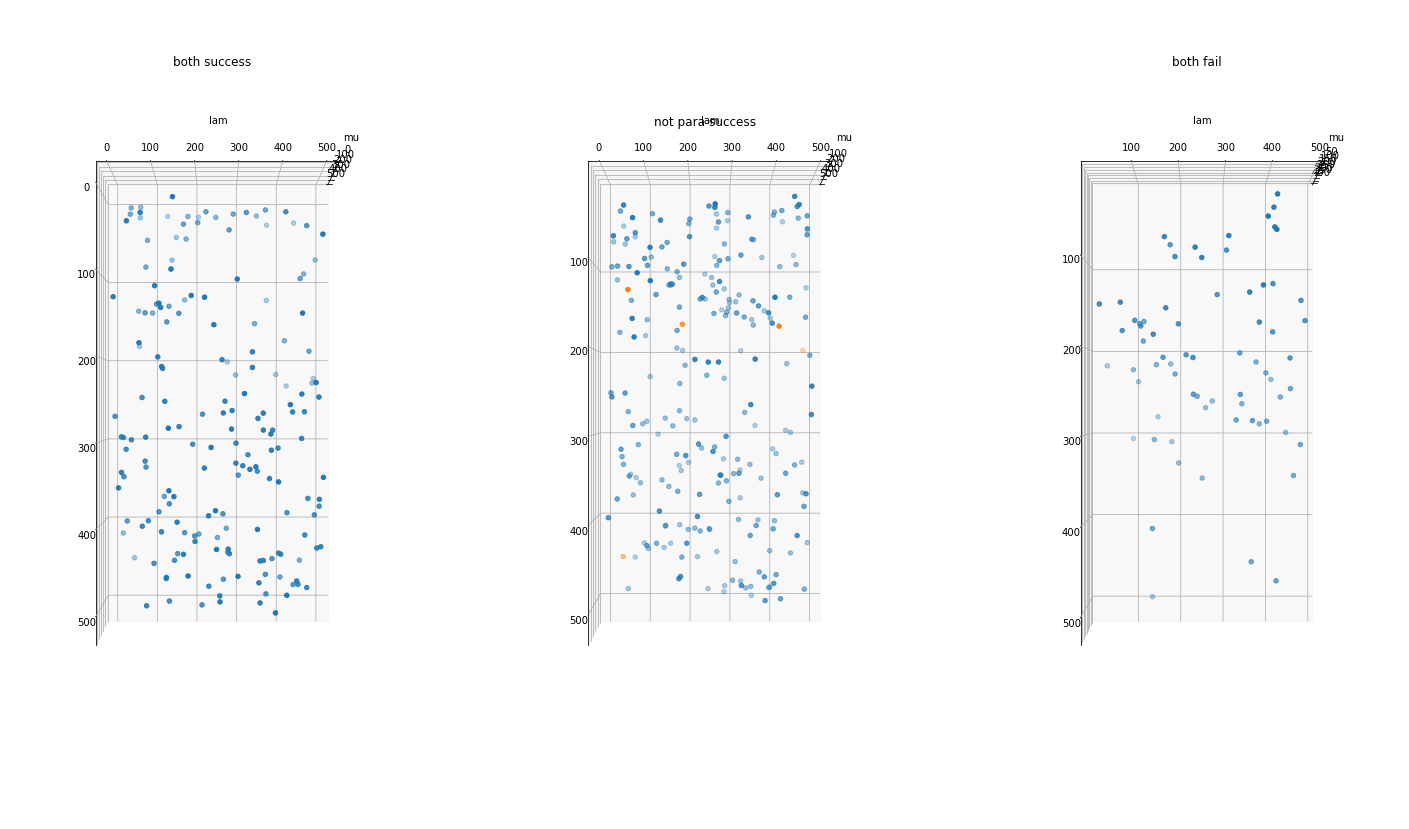

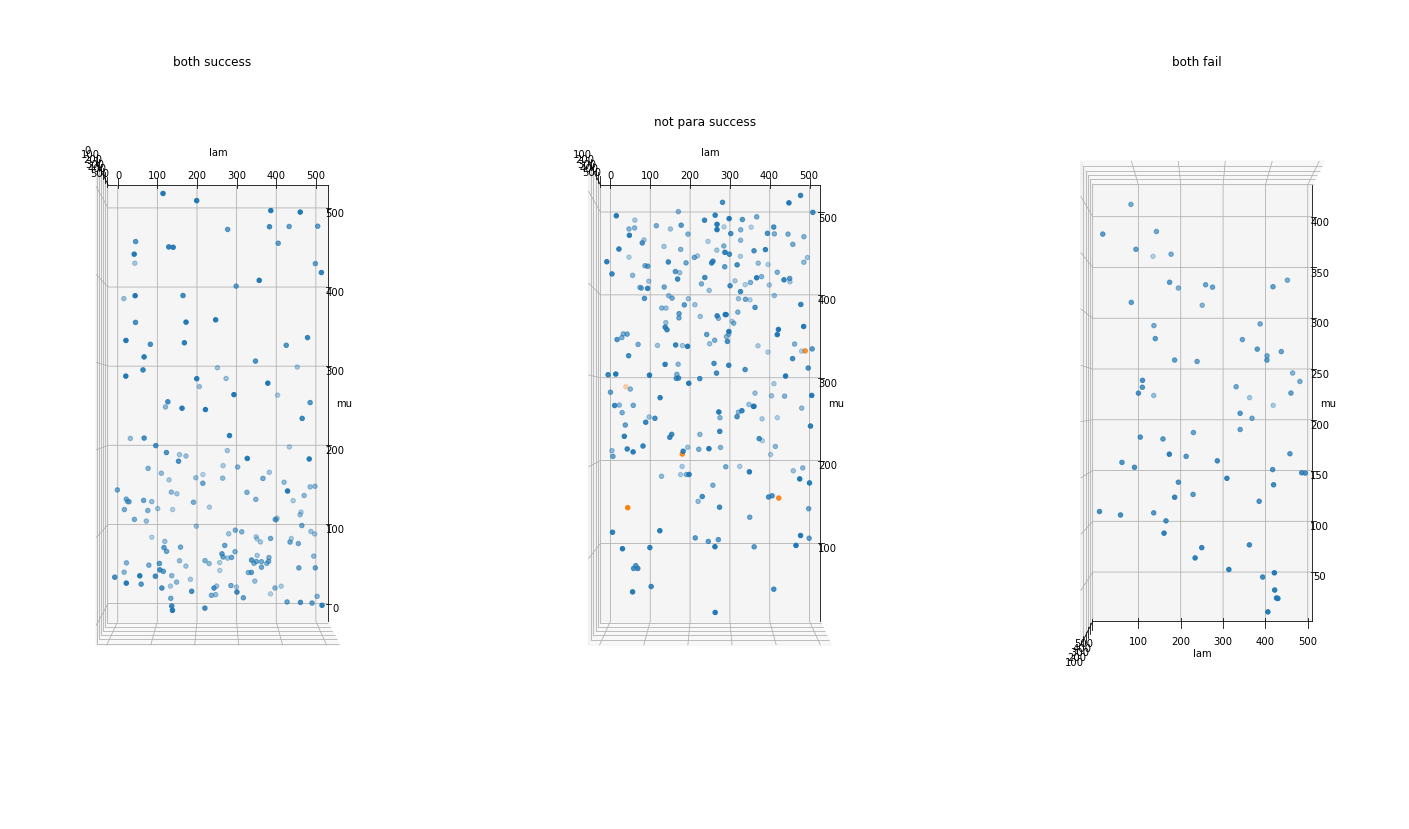

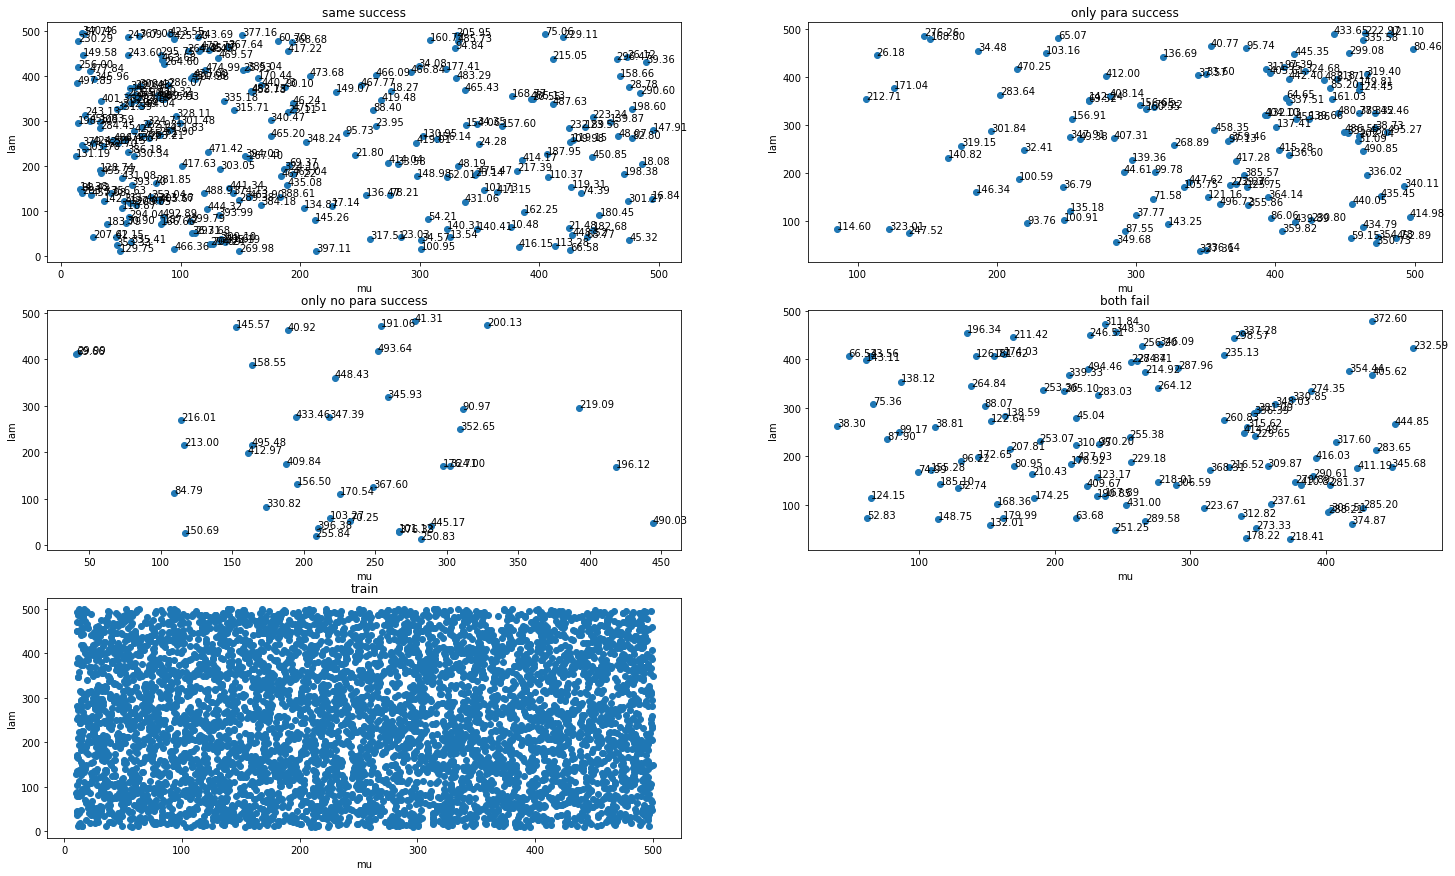

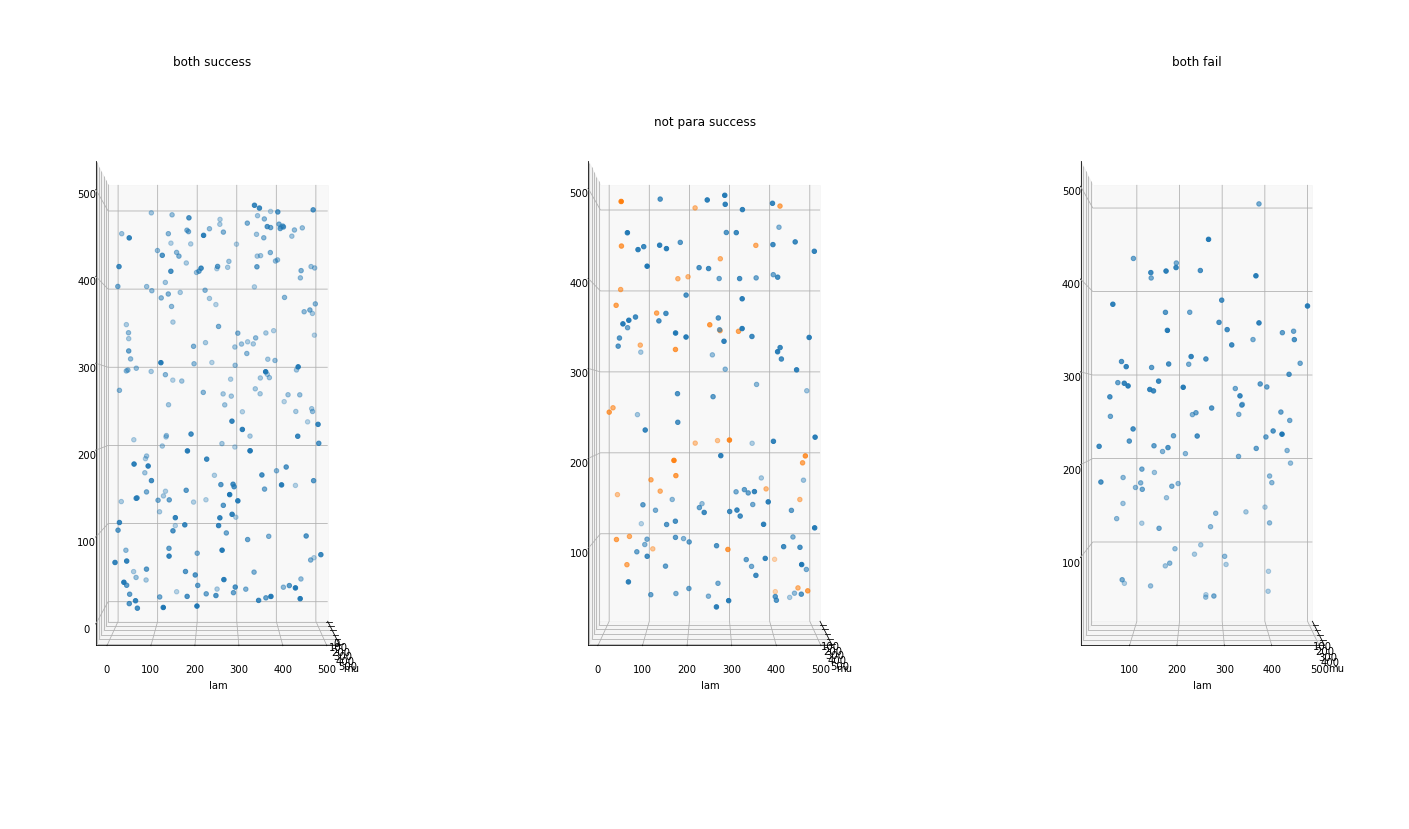

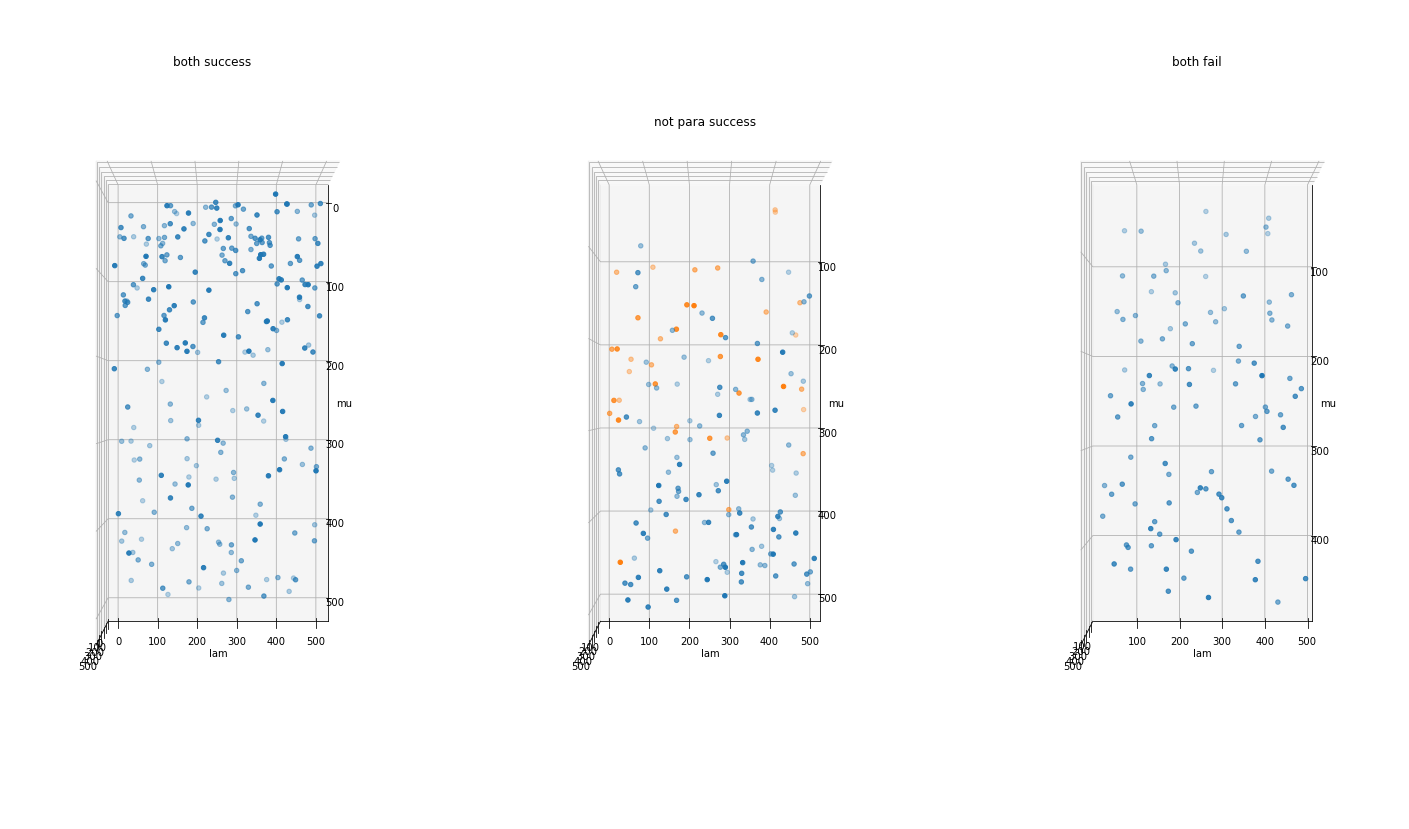

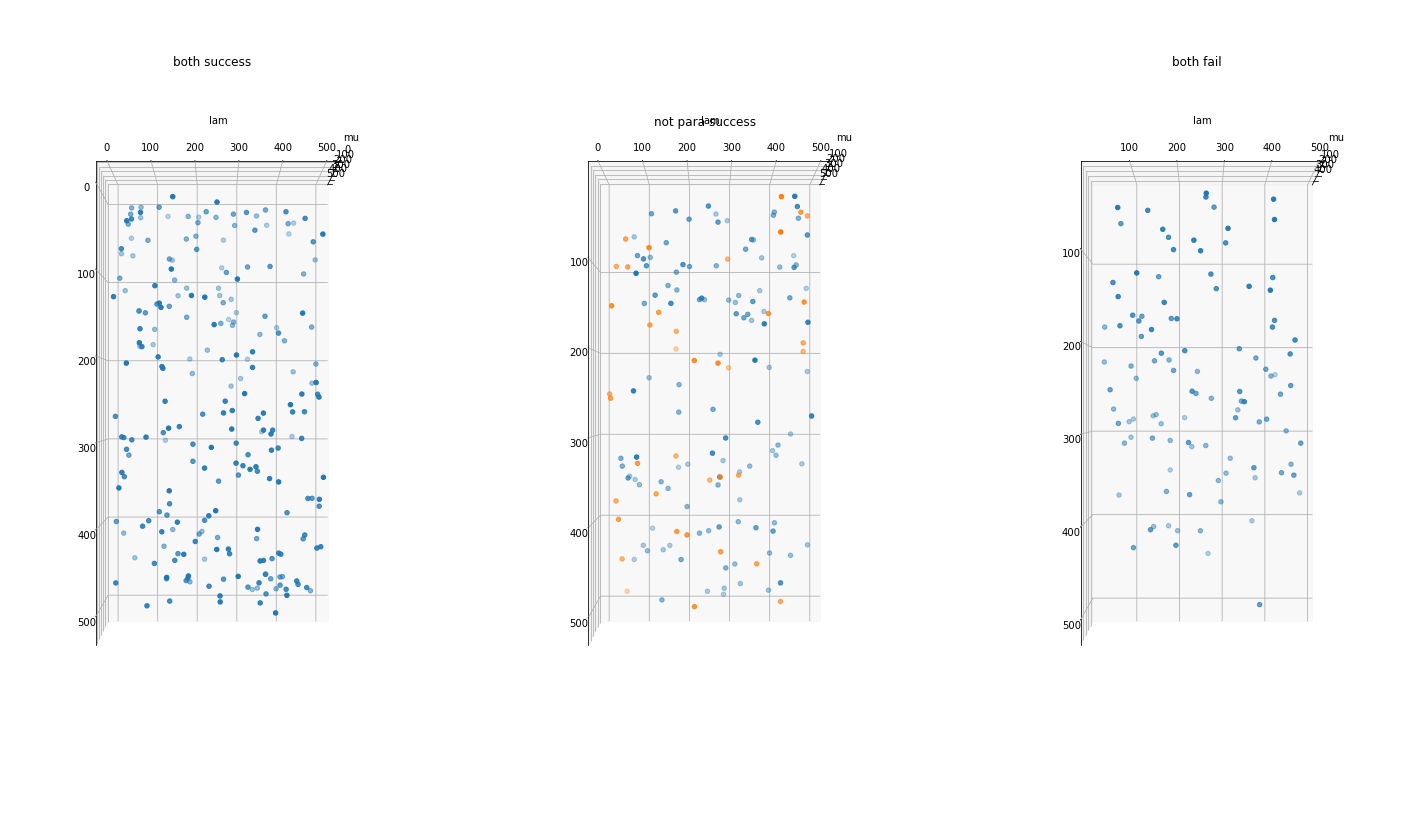

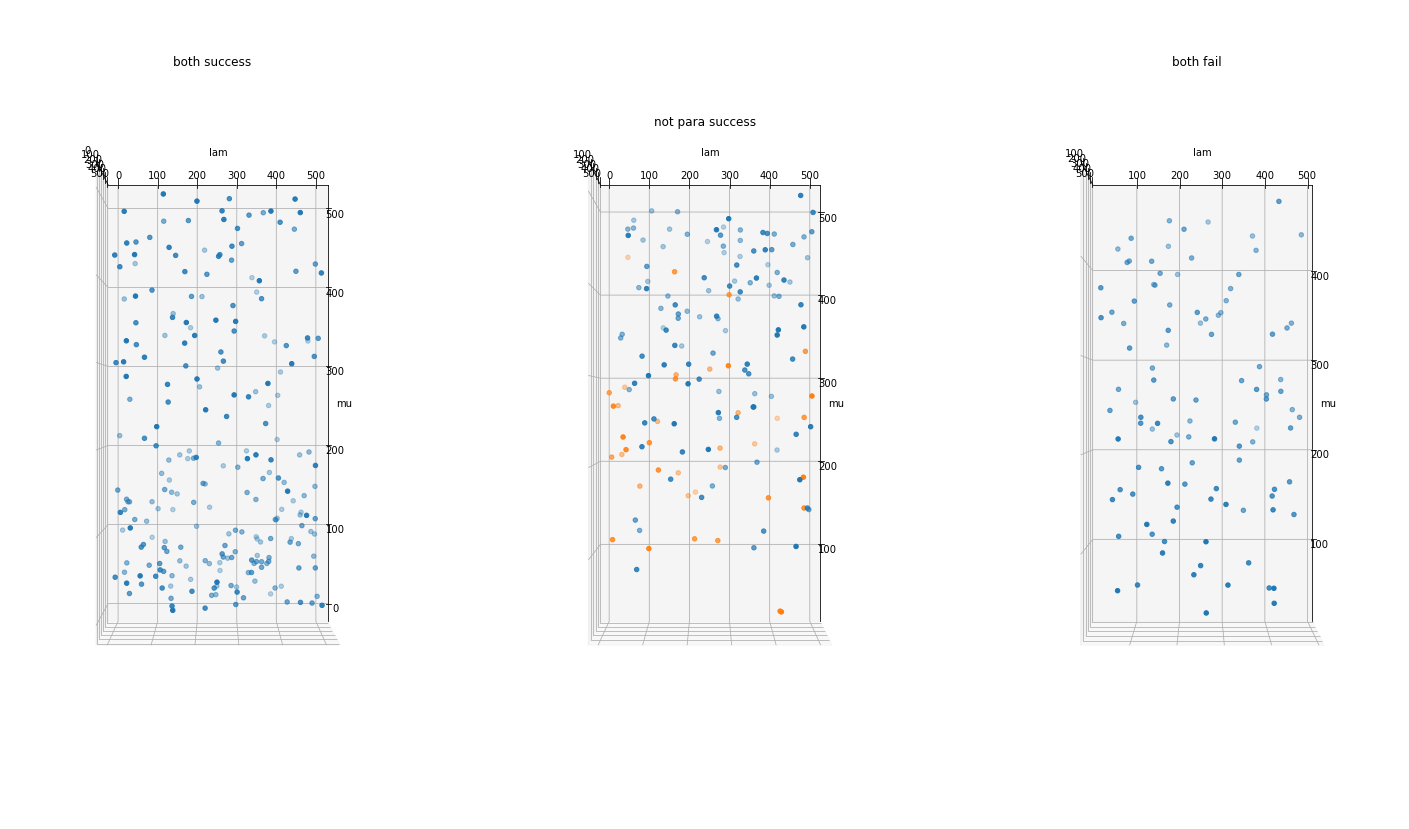

In [18]:
for epoch in range(1000):

    train_files = '/home/robot_dev3/kuroki/UniDOM/ExPCP/policy/data/Rope_10_500_10_500_10_500/2023-05-05_15-51'
    para_list = glob.glob(f'/home/robot_dev3/kuroki/UniDOM/ExPCP/policy/log/Rope_10_500_10_500_10_500/2023-05-06_03-11/para/2023-05-06_11-46/Rope/last_iou_{epoch}_*.txt')
    not_para_list = glob.glob(f'/home/robot_dev3/kuroki/UniDOM/ExPCP/policy/log/Rope_10_500_10_500_10_500/2023-05-06_03-11/no_para/2023-05-06_11-46/Rope/last_iou_{epoch}_*.txt')
    if len(para_list) == len(not_para_list) and len(para_list) != 0:
        print('-----------------------------------------')
        print('train iteration', epoch)
        print('-----------------------------------------')
        

        def info_iou(path_list):
            length_list = []
            mu_list = []
            lam_list = []
            yield_stress_list = []
            success_flag = []
            for path in path_list:
                with open(path, 'r') as f:
                    data = f.read()
                data_split = data.split(',')
                if data_split[0] != '0':
                    success_flag.append(1)
                else:
                    success_flag.append(0)
                length_list.append(float(data_split[0]))
                mu_list.append(float(data_split[1]))
                lam_list.append(float(data_split[2]))
                yield_stress_list.append(float(data_split[3]))

            print('success', sum(success_flag), '/', len(path_list))
            print('length', 'mean', np.mean(length_list), 'std', np.std(length_list))
            print('mu', 'mean', np.mean(mu_list), 'std', np.std(mu_list))
            print('lam', 'mean', np.mean(lam_list), 'std', np.std(lam_list))
            print('yield_stress', 'mean', np.mean(yield_stress_list), 'std', np.std(yield_stress_list))
            print('---------------------------')
            return length_list, mu_list, lam_list, yield_stress_list, success_flag

        print('with parameter policy')
        para_length_list, para_mu_list, para_lam_list, para_yield_stress_list, para_success_flag = info_iou(para_list)
        print('without parameter policy')
        length_list, mu_list, lam_list, yield_stress_list, success_flag = info_iou(not_para_list)

        if True:
            fig = plt.figure(figsize=(25, 15))


            # test

            # same success
            same_success = (np.array(para_success_flag) * np.array(success_flag)).tolist()

            same_para_length_list = []
            same_no_para_length_list = []
            same_mu_list = []
            same_lam_list = []
            same_yield_stress_list = []
            for idx, value in enumerate(same_success):
                if value == 1:
                    same_para_length_list.append(para_length_list[idx])
                    same_no_para_length_list.append(length_list[idx])

                    same_mu_list.append(mu_list[idx])
                    same_lam_list.append(lam_list[idx])
                    same_yield_stress_list.append(yield_stress_list[idx])

            print('same success count', sum(same_success))
            print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
            print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

            ax1 = fig.add_subplot(3, 2, 1)
            ax1.scatter(same_mu_list, same_lam_list)
            ax1.set_ylabel('lam')
            ax1.set_xlabel('mu')

            for i, txt in enumerate(same_yield_stress_list):
                ax1.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
            ax1.set_title('same success')


            # only para success
            same_success = (np.array(para_success_flag) - np.array(success_flag)).tolist()

            same_para_length_list = []
            same_no_para_length_list = []
            same_mu_list = []
            same_lam_list = []
            same_yield_stress_list = []
            for idx, value in enumerate(same_success):
                if value == 1:
                    same_para_length_list.append(para_length_list[idx])
                    same_no_para_length_list.append(length_list[idx])

                    same_mu_list.append(mu_list[idx])
                    same_lam_list.append(lam_list[idx])
                    same_yield_stress_list.append(yield_stress_list[idx])

            print('same success count', sum(same_success))
            print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
            print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


            ax2 = fig.add_subplot(3, 2, 2)
            ax2.scatter(same_mu_list, same_lam_list)
            ax2.set_ylabel('lam')
            ax2.set_xlabel('mu')

            for i, txt in enumerate(same_yield_stress_list):
                ax2.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
            ax2.set_title('only para success')

            # only not para success
            same_success = (np.array(success_flag) - np.array(para_success_flag)).tolist()

            same_para_length_list = []
            same_no_para_length_list = []
            same_mu_list = []
            same_lam_list = []
            same_yield_stress_list = []
            for idx, value in enumerate(same_success):
                if value == 1:
                    same_para_length_list.append(para_length_list[idx])
                    same_no_para_length_list.append(length_list[idx])

                    same_mu_list.append(mu_list[idx])
                    same_lam_list.append(lam_list[idx])
                    same_yield_stress_list.append(yield_stress_list[idx])

            print('same success count', sum(same_success))
            print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
            print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

            ax3 = fig.add_subplot(3, 2, 3)
            ax3.scatter(same_mu_list, same_lam_list)
            ax3.set_ylabel('lam')
            ax3.set_xlabel('mu')

            for i, txt in enumerate(same_yield_stress_list):
                ax3.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
            ax3.set_title('only no para success')


            # both fail
            same_success = (np.array(success_flag) + np.array(para_success_flag)).tolist()

            same_para_length_list = []
            same_no_para_length_list = []
            same_mu_list = []
            same_lam_list = []
            same_yield_stress_list = []
            for idx, value in enumerate(same_success):
                if value == 0:
                    same_para_length_list.append(para_length_list[idx])
                    same_no_para_length_list.append(length_list[idx])

                    same_mu_list.append(mu_list[idx])
                    same_lam_list.append(lam_list[idx])
                    same_yield_stress_list.append(yield_stress_list[idx])

            print('same success count', sum(same_success))
            print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
            print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


            ax4 = fig.add_subplot(3, 2, 4)
            ax4.scatter(same_mu_list, same_lam_list)
            ax4.set_ylabel('lam')
            ax4.set_xlabel('mu')

            for i, txt in enumerate(same_yield_stress_list):
                ax4.annotate(f'{txt:.2f}', (same_mu_list[i], same_lam_list[i]))
            ax4.set_title('both fail')


            # train     
            train_mu_list = np.load(f'{train_files}/mu.npy')
            train_lam_list = np.load(f'{train_files}/lam.npy')
            train_yield_stress_list = np.load(f'{train_files}/yield_stress.npy')

            ax5 = fig.add_subplot(3, 2, 5)
            ax5.scatter(train_mu_list, train_lam_list)
            ax5.set_ylabel('lam')
            ax5.set_xlabel('mu')

            # for i, txt in enumerate(train_yield_stress_list):
            #     ax5.annotate(f'{txt:.2f}', (train_mu_list[i], train_lam_list[i]))
            ax5.set_title('train')



            for i in range(0, 360, 90):
                fig = plt.figure(figsize=(25, 15))


                # test

                # same success
                same_success = (np.array(para_success_flag) * np.array(success_flag)).tolist()

                same_para_length_list = []
                same_no_para_length_list = []
                same_mu_list = []
                same_lam_list = []
                same_yield_stress_list = []
                for idx, value in enumerate(same_success):
                    if value == 1:
                        same_para_length_list.append(para_length_list[idx])
                        same_no_para_length_list.append(length_list[idx])

                        same_mu_list.append(mu_list[idx])
                        same_lam_list.append(lam_list[idx])
                        same_yield_stress_list.append(yield_stress_list[idx])

                print('same success count', sum(same_success))
                print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
                print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

                ax1 = fig.add_subplot(1, 3, 1, projection='3d')
                ax1.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
                ax1.set_ylabel('lam')
                ax1.set_xlabel('mu')
                ax1.set_title('both success')
                ax1.view_init(i, 0)


                # only para success
                same_success = (np.array(para_success_flag) - np.array(success_flag)).tolist()

                same_para_length_list = []
                same_no_para_length_list = []
                same_mu_list = []
                same_lam_list = []
                same_yield_stress_list = []
                for idx, value in enumerate(same_success):
                    if value == 1:
                        same_para_length_list.append(para_length_list[idx])
                        same_no_para_length_list.append(length_list[idx])

                        same_mu_list.append(mu_list[idx])
                        same_lam_list.append(lam_list[idx])
                        same_yield_stress_list.append(yield_stress_list[idx])

                print('same success count', sum(same_success))
                print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
                print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


                ax2 = fig.add_subplot(1, 3, 2, projection='3d')
                ax2.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
                ax2.set_ylabel('lam')
                ax2.set_xlabel('mu')
                ax2.set_title('para success')


                # only not para success
                same_success = (np.array(success_flag) - np.array(para_success_flag)).tolist()

                same_para_length_list = []
                same_no_para_length_list = []
                same_mu_list = []
                same_lam_list = []
                same_yield_stress_list = []
                for idx, value in enumerate(same_success):
                    if value == 1:
                        same_para_length_list.append(para_length_list[idx])
                        same_no_para_length_list.append(length_list[idx])

                        same_mu_list.append(mu_list[idx])
                        same_lam_list.append(lam_list[idx])
                        same_yield_stress_list.append(yield_stress_list[idx])

                print('same success count', sum(same_success))
                print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
                print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))

                ax2.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
                ax2.set_ylabel('lam')
                ax2.set_xlabel('mu')
                ax2.set_title('not para success')
                ax2.view_init(i, 0)

                # both fail
                same_success = (np.array(success_flag) + np.array(para_success_flag)).tolist()

                same_para_length_list = []
                same_no_para_length_list = []
                same_mu_list = []
                same_lam_list = []
                same_yield_stress_list = []
                for idx, value in enumerate(same_success):
                    if value == 0:
                        same_para_length_list.append(para_length_list[idx])
                        same_no_para_length_list.append(length_list[idx])

                        same_mu_list.append(mu_list[idx])
                        same_lam_list.append(lam_list[idx])
                        same_yield_stress_list.append(yield_stress_list[idx])

                print('same success count', sum(same_success))
                print('same para length', 'mean', np.mean(same_para_length_list), 'std', np.std(same_para_length_list))
                print('same not para length', 'mean', np.mean(same_no_para_length_list), 'std', np.std(same_no_para_length_list))


                ax3 = fig.add_subplot(1, 3, 3, projection='3d')
                ax3.scatter(same_mu_list, same_lam_list, same_yield_stress_list)
                ax3.set_ylabel('lam')
                ax3.set_xlabel('mu')
                ax3.set_title('both fail')
                ax3.view_init(i, 0)



                # # train
                # train_mu_list = []
                # train_lam_list = []
                # train_yield_stress_list = []

                # for path in train_files:
                #     with open(path, 'rb') as f: 
                #         data = pickle.load(f)           
                #     train_mu_list.append(data['mu'])
                #     train_lam_list.append(data['lam'])
                #     train_yield_stress_list.append(data['yield_stress'])

                # ax5 = fig.add_subplot(3, 2, 5, projection='3d')
                # ax5.scatter(train_mu_list, train_lam_list, same_yield_stress_list)
                # ax5.set_ylabel('lam')
                # ax5.set_xlabel('mu')

                # ax5.set_title('train')